# 7-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자


## 7.1 사진 모으기

### 7.1.1 내 사진 찍기

### 7.1.2 비교한 연예인 사진 모으기

## 7.2 얼굴 영역 자르기

In [1]:
import face_recognition
import os
import matplotlib.pyplot as plt

def get_gropped_face(image_file):

    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)



    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

   
    return cropped_face

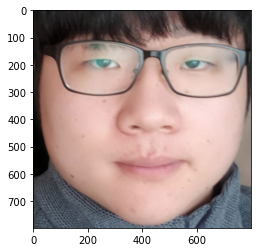

In [2]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/석민규1.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

## 7.3  얼굴 영역의 임베딩 추출하기

In [3]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['신동엽.jpg', '조이.jpg', '조승우.jpeg', '잇섭.png', '차두리.jpeg', 'bush.jpeg', '최현석.jpg', '손흥민.jpg', '나인뮤지스경리.jpg', '봉준호.jpg', '하현우.jpg', '김광현.jpg', '뷔.png', '주호민.jpeg', '유희열.jpeg', '영알남.png', '최무성.jpg', '트와이스나연.jpg', '이안 굿펠로우.jpg', '신태용.jpg', '김대중.jpg', '황병국.jpg', '류승룡.jpeg', '박성호.jpg', '슬리피.jpg', '여자아이들수진.jpeg', '정우성.jpeg', 'biden.jpg', '아이즈원조유리.jpeg', '이용진.jpg', '윤균상.jpg', '디오.jpeg', '한기범.jpg', '기성용.jpg', '로다주.jpeg', '아이즈원민주.jpg', '이명박.jpg', '지수.jpg', '채연.jpg', '이동국.jpeg', '레오나르도 디카프리오.jpeg', '노홍철.jpeg', '리아.jpg', '지민(BTS).jpg', '문별.jpg', '박보검.jpg', '김연우.jpeg', '윤아.jpg', '최준석.jpg', '김구라.jpg', '송중기.jpeg', '승희.jpeg', '리암 니슨.png', '솔라.jpg', '박정민.jpg', '아이즈원김채원.jpg', '트와이스미나.jpg', '도아.jpeg', 'clinton.jpeg', '박명수.jpg', '이제훈.jpeg', '줄리엔강.png', '조인성.jpg', '무라니시.png', '씨잼.jpg', '류현진.jpg', '클린트 이스트우드.jpg', '성룡.jpg', '아놀드 슈워제네거.jpg', '공효진.jpg', '하정우.jpg', '트와이스정연.jpg', '세훈.jpg', '꽈두룹.jpeg', '이광수.jpg', '지드래곤.jpeg', '마동석.jpeg', '김래원.jpeg', '대도서관.jpeg', '윤도현.png', '이대형.jpg', '공유.jpg', '돈스파이크.jp

In [4]:
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08126269,  0.11014768, -0.01082436, -0.05268788,  0.01033718,
        -0.00813816, -0.07251763, -0.0922645 ,  0.19304708, -0.09246373,
         0.23908535,  0.06770279, -0.22123131, -0.14119366,  0.05562147,
         0.13705502, -0.17924425, -0.07232318, -0.11183269, -0.1137081 ,
         0.03956441, -0.01019115,  0.09421787,  0.04493123, -0.12757549,
        -0.34449592, -0.05374937, -0.17703311,  0.0086822 , -0.09721596,
        -0.0981718 ,  0.00278224, -0.17721362, -0.12789804,  0.03489832,
        -0.01991243, -0.00838929, -0.00132872,  0.18308586,  0.02447556,
        -0.12376561,  0.09957034,  0.02323559,  0.22983313,  0.28385225,
         0.06655719, -0.00558919, -0.0983354 ,  0.10058986, -0.23476943,
         0.060063  ,  0.13415909,  0.08373024,  0.03900502,  0.1019453 ,
        -0.19337651,  0.01717638,  0.08978971, -0.16005102,  0.01892098,
         0.03082444, -0.0605129 , -0.04526768,  0.04633341,  0.20678672,
         0.10299793, -0.12437527, -0.04905149,  0.1

In [5]:
from PIL import Image
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/save_images/'
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    face = get_gropped_face(image_file)
    embedding_dict = {}
    pillow_image = {}
    #a = 1
    for file in file_list:
        #print(a)
        #a = a + 1
        #print(file, face)        
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            pillow_image = Image.fromarray(face)
            pillow_image.save(path_to_save + os.path.splitext(file)[0], format = 'jpeg')

        
    return embedding_dict

얼굴 추출 못하는 이미지 제거

결과 이미지화를 위해 크롭이미지 별도 저장하도록 추가

save함수 오류 발생. (이미지경로 + 이미지 이름, 이미지확장자, )

In [8]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['우기']

array([-0.07744551,  0.05722142,  0.00913413, -0.09517768, -0.13188209,
       -0.05949703, -0.09195066, -0.03244817,  0.13176759, -0.07606974,
        0.15282732, -0.12783021, -0.23216194, -0.00521235, -0.09851217,
        0.24820374, -0.14558391, -0.12519538, -0.02343721,  0.01424886,
        0.098017  ,  0.08389494, -0.01947493,  0.05901033, -0.13987491,
       -0.29371855, -0.07217021, -0.03968598, -0.08312344, -0.0833057 ,
        0.01555116,  0.10943159, -0.15697877,  0.02460162,  0.06017532,
        0.08236668,  0.00992185, -0.06487441,  0.1628409 ,  0.05162485,
       -0.33624187,  0.07261083,  0.08510629,  0.2578049 ,  0.16268145,
        0.00336321,  0.01610224, -0.16732162,  0.09093203, -0.1927415 ,
        0.00072136,  0.14474103,  0.01736843,  0.00553565,  0.01023231,
       -0.12057348,  0.05155965,  0.11554514, -0.16563188, -0.02960235,
        0.11985948, -0.02500059, -0.01060409, -0.12880975,  0.19410673,
        0.02435465, -0.14555679, -0.20437482,  0.09000207, -0.18

## 7.4 모은 연예인들과 비교하기

In [9]:
import numpy as np
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('신동엽', '조이')

0.7260810439433143

In [10]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('석민규1')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [88]:
from matplotlib.image import imread
def get_nearest_face(name, top=5):
   
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    
    
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
        
            photo_path = os.getenv('HOME')+'/aiffel/face_embedding/save_images/' + sorted_faces[i][0]
            print_name = imread(photo_path)
            plt.imshow(print_name)
            plt.show()


imread를 import하여 이미지 생성.   
경로설정에 오타가 있는것을 발견하지 못하고 2시간 허비

순위 1 : 이름(장원준), 거리(0.40729339318764823)


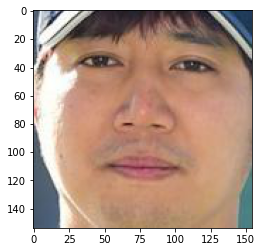

순위 2 : 이름(이용진), 거리(0.42687289955123703)


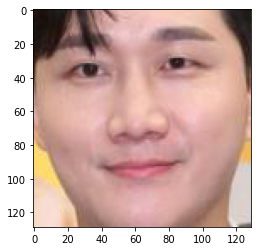

순위 3 : 이름(최양락), 거리(0.4291036096202551)


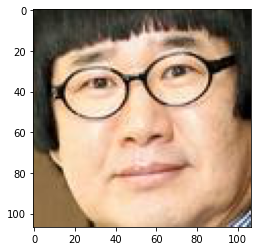

순위 4 : 이름(하현우), 거리(0.4525780013749538)


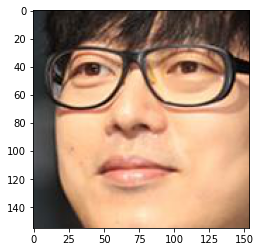

순위 5 : 이름(성시경), 거리(0.452727852432689)


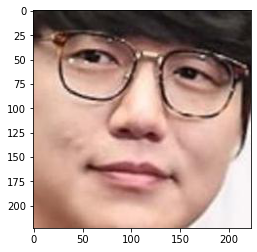

In [87]:
get_nearest_face('석민규1')

# 회고
이건 또 무슨오류야? 싶은 것의 90%는 경로문제라는것을 다시한번 느꼈다.
모델을 시행후 결과를 봤을때 생각보다 결과가 애매모호해서 ??? 했다.   
상세한 이목구비 보다는 얼굴 전체적인 윤곽의 일치율을 더 중요시하는것 같았고 그 후 안경과 같은 특정 포인트에    
중점을 두고 거리를 측정하는것 같다.
프로젝트를 수행하면서 시간이 오래걸렸던 부분으로는 이미지 출력 관련 부분이었는데   
이미지를 잘라서 저장하는것부터 저장한 이미지를 출력하도록 만드는데까지 걸린 시간이   
전체 진행시간의 70%는 차지한 것 같다. 
경로등 기존에 작성한 부분들은 제발 다시 수기작성하지 말고 오류가 발생하지 않도록 복사, 붙여넣기를 활용하도록 하자.
